<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/prima_misura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import scipy as sp
from scipy.stats import powerlaw
import math
import matplotlib.pyplot as plt
import time
from scipy.optimize import curve_fit

In [ ]:
L = 32;
Spins = np.ones((L));   # configurazione iniziale
Spins.shape, Spins

((32,),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

#PARAMETRI SIMULAZIONE

In [57]:
# accoppiamento
J0 = 1

# dimensione
d = 1

#numero di vicini considerati per l'interazione
q = 3
# SIGMA
sigmas =[0.4, 0.75, 1.20] # sigmas = np.arange(0.4,1.2,0.1)

# TEMPERATURE
Temperatures =np.linspace(0.01,1.01,num=15)
k_b = 1 

# LUNGHEZZA CATENA
ChainLength = [16,32,64,128,256] #ChainLength = [32, 64, 128, 256, 512, 1024]

# Numero di cicli 
steps = 1000

In [58]:
# INIZIALIZZAZIONE VARIABILI CICLI

distances = np.zeros((q),int)
dE = np.zeros((q))
dE_tot = 0
m = np.zeros(steps)
m2 = np.zeros(steps)

In [59]:
def areDistinct(arr) :
  '''
  True if all elements are distinct
  False otherwise
  '''
  n = len(arr)

  # Put all array elements in a map
  s = set()
  for i in range(0, n):
      s.add(arr[i])
    
  # If all elements are distinct,
  # size of set should be same array.
  return (len(s) == len(arr))

In [60]:
def distance_PBC_1d(x,y,L):
  '''
  returns the distance between two sites in Periodic Boundary Condition
  '''
  return min((x-y)%L,(y-x)%L)

In [61]:
ChiMatrix = np.zeros((len(sigmas),len(ChainLength),len(Temperatures)))
errChiMatrix = np.zeros((len(sigmas),len(ChainLength),len(Temperatures)))

for s in range(len(sigmas)):  # ciclo sui valori di sigma
  sigma = sigmas[s]
  # argomento distribuzione 
  arg = d + sigma + 1 

  ChiL = np.zeros(len(ChainLength))

  for l in range(len(ChainLength)): # ciclo sulla lunchezza della catena di spin
    L = ChainLength[l] 
    Spins = np.ones((L));   # configurazione iniziale

    mt = np.zeros(len(Temperatures))
    m2t = np.zeros(len(Temperatures))
    err_mt = np.zeros(len(Temperatures))
    err_mt2 = np.zeros(len(Temperatures))
    
   
    for t in range(len(Temperatures)): # ciclo sulle temperature
      T = Temperatures[t]
      beta = 1/(k_b * T)
      now_time = time.time()

      for k in range(steps):    # ciclo sugli step
        for g in range(L):      # per ogni step ripeto la dinamica di Glauber L volte
          i = int(np.around(np.random.rand(1)*(L-1))) # estraggo spin casuale
          Q = np.ones(q)
          
          while not areDistinct(Q):  # controllo che q vicini siano diversi tra loro e diversi da spin estratto
            Q = (i + np.around( (2*sp.stats.randint.rvs(0,2,size = q)-1)*(1/powerlaw.rvs(arg,size=q)) ))%(L)
            Q=np.append(Q,i)
          for j in range(q):
            dE = np.zeros((q))
            dE_tot = 0
            a = int(Q[j])
            distance = distance_PBC_1d(Q[j],i,L)
            dE[j] = ( (-Spins[i])*Spins[a] - Spins[i]*Spins[a] ) * ( J0/(distance)**(d+sigma)) 
            dE_tot += dE[j]

          if  np.random.rand(1) < 1/(1 + np.exp(beta * dE_tot) ):  # Glauber Dynamic
             Spins[i] = - Spins[i] 

        m[k] = Spins.sum()/L # magnetizzazione media
        m2[k] = m[k]**2       # magnetizzazione media^2

      print("--- %s seconds ---" % (time.time()-now_time)) 
      mt[t] = m.mean() 
      m2t[t] = m2.mean()

      #err_mt[t] = np.std(m)
      #err_mt2[t] = np.std(m2)

      ChiMatrix[s,l,t] = ((1/T)*(m2t[t] - (mt[t])**2))/L   # suscettività magnetica fratto numero di spins
      #errChiMatrix[s,l,t] = (((1/T)*(m2t[t] - (mt[t])**2))/L)*(2*(err_mt[t]/mt[t])+(err_mt2[t]/m2t[t]))
    
    


--- 8.153044700622559 seconds ---
--- 8.325867891311646 seconds ---
--- 8.467772722244263 seconds ---
--- 8.136134624481201 seconds ---
--- 8.290245056152344 seconds ---
--- 8.112841606140137 seconds ---
--- 8.36757493019104 seconds ---
--- 8.586079597473145 seconds ---
--- 8.141082763671875 seconds ---
--- 7.490102767944336 seconds ---
--- 8.13103437423706 seconds ---
--- 8.466735601425171 seconds ---
--- 7.7675909996032715 seconds ---
--- 7.986126184463501 seconds ---
--- 8.117018699645996 seconds ---
--- 16.38259243965149 seconds ---
--- 16.349074840545654 seconds ---
--- 16.28753900527954 seconds ---
--- 17.148911476135254 seconds ---
--- 17.201549768447876 seconds ---
--- 16.48879051208496 seconds ---
--- 17.06568956375122 seconds ---
--- 16.581717252731323 seconds ---
--- 16.94883894920349 seconds ---
--- 16.710429906845093 seconds ---
--- 16.608083486557007 seconds ---
--- 16.65451979637146 seconds ---
--- 17.0463387966156 seconds ---
--- 16.256654024124146 seconds ---
--- 16.33

In [ ]:
Q

array([1., 1., 1., 8.])

# PLOT

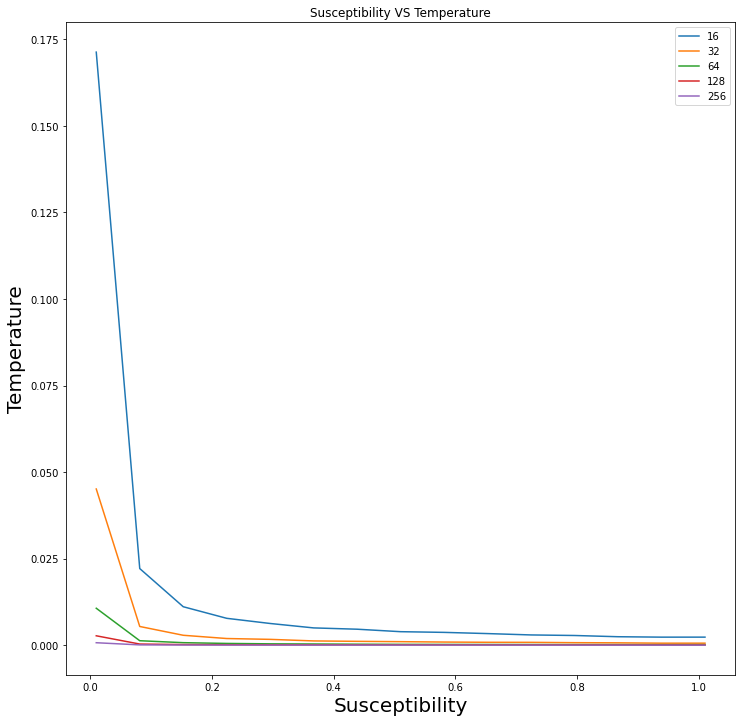

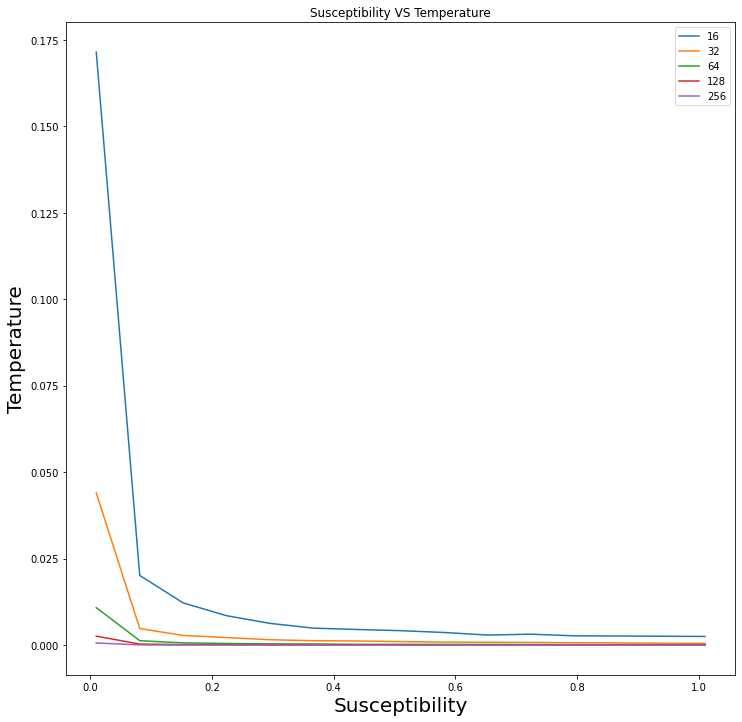

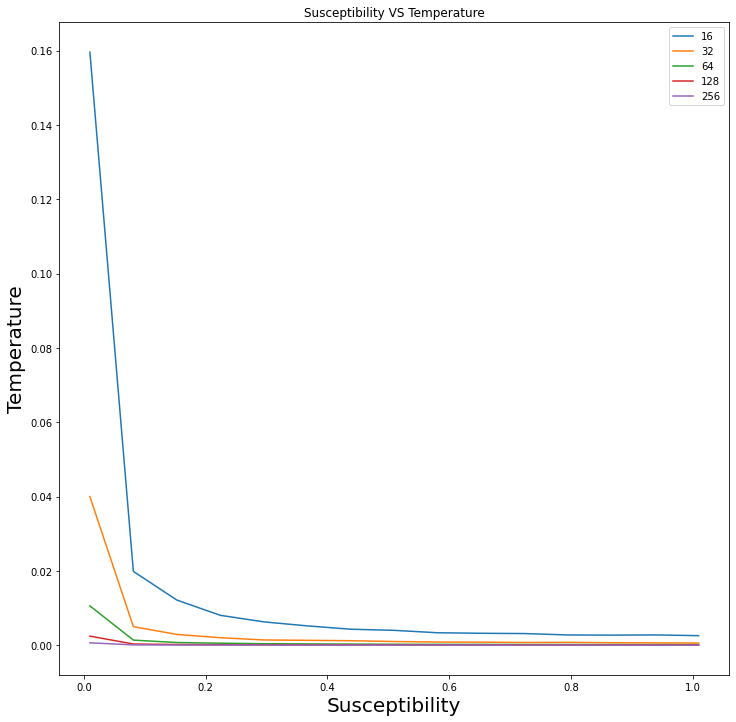

In [62]:
for s in range(len(sigmas)):
  ax = plt.figure(figsize=(12,12)).add_subplot(111)
  plt.title("Susceptibility VS Temperature")
  for l in range(len(ChainLength)):
    plt.errorbar(Temperatures, ChiMatrix[s,l,],  fmt='-', ms=0,
                fcolor=None, label=ChainLength[l])
    plt.legend()
    plt.ylabel("Temperature", fontsize=20)
    plt.xlabel("Susceptibility", fontsize=20);

In [63]:
for i in range(len(sigmas)):
  for j in range(len(ChainLength)):
    print(max(ChiMatrix[i,j,]))
    

0.171312109375
0.04511766357421875
0.0106685546875
0.00271322250366211
0.0007093420982360839
0.17146240234375
0.044034716796875005
0.010863348388671876
0.002605276298522949
0.0006311431884765625
0.15957412109375
0.0399744140625
0.0105734619140625
0.002439887809753418
0.0006353855133056641


In [7]:
# massimi delle magnetizzazioni in funzione di T per ognuno dei 3 sigma studiati
ChainLength = [16,32,64,128,256]
Xsigma1=[0.171312109375,0.04511766357421875,0.0106685546875,0.00271322250366211,0.0007093420982360839]
Xsigma2=[0.17146240234375,0.044034716796875005,0.010863348388671876,0.002605276298522949,0.0006311431884765625]
Xsigma3=[0.15957412109375,0.0399744140625,0.0105734619140625,0.002439887809753418,0.0006353855133056641]

[-1.98874728  3.75816837]


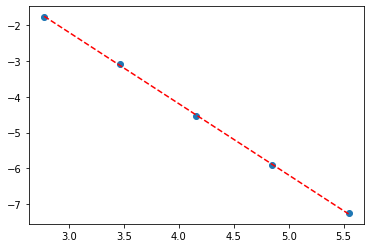

In [16]:
# CURVE FITTING
# define the true objective function
def objective(x, a, c):
  return a * x + c

# choose the input and output variables
x, y = np.log(ChainLength), np.log(Xsigma1) #np.log(Xsigma1*np.array(ChainLength))
# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, c = popt
print(popt)
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.linspace(min(x), max(x))
# calculate the output for the range
y_line = objective(x_line, a, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()


[-2.02505515  3.87662296]


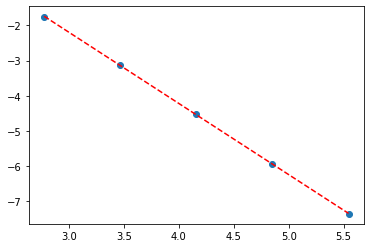

In [17]:
# choose the input and output variables
x, y = np.log(ChainLength), np.log(Xsigma2) #np.log(Xsigma1*np.array(ChainLength))
# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, c = popt
print(popt)
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.linspace(min(x), max(x))
# calculate the output for the range
y_line = objective(x_line, a, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

[-1.99789477  3.71276032]


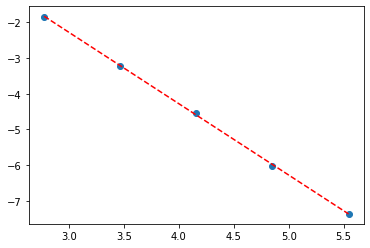

In [18]:
# choose the input and output variables
x, y = np.log(ChainLength), np.log(Xsigma3) #np.log(Xsigma1*np.array(ChainLength))
# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, c = popt
print(popt)
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.linspace(min(x), max(x))
# calculate the output for the range
y_line = objective(x_line, a, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [4]:
np.log?

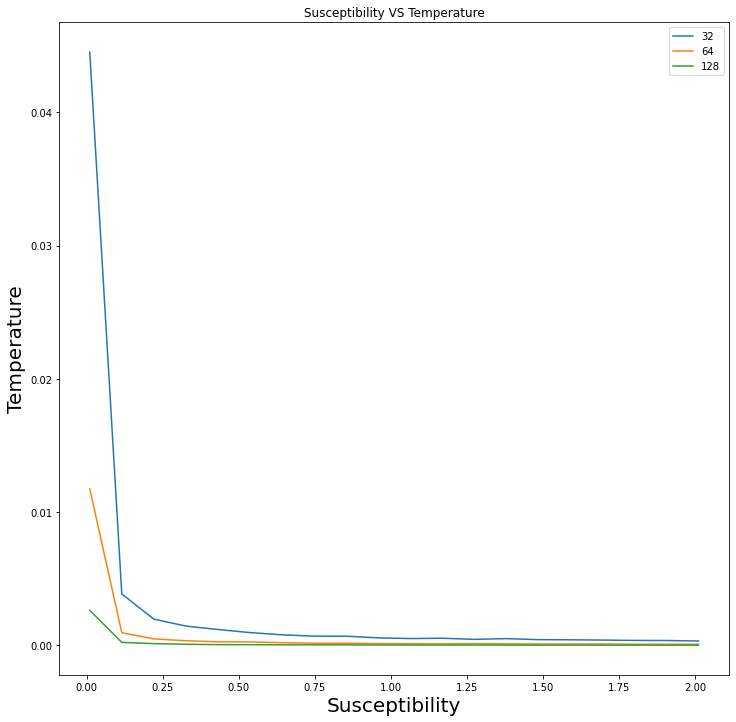

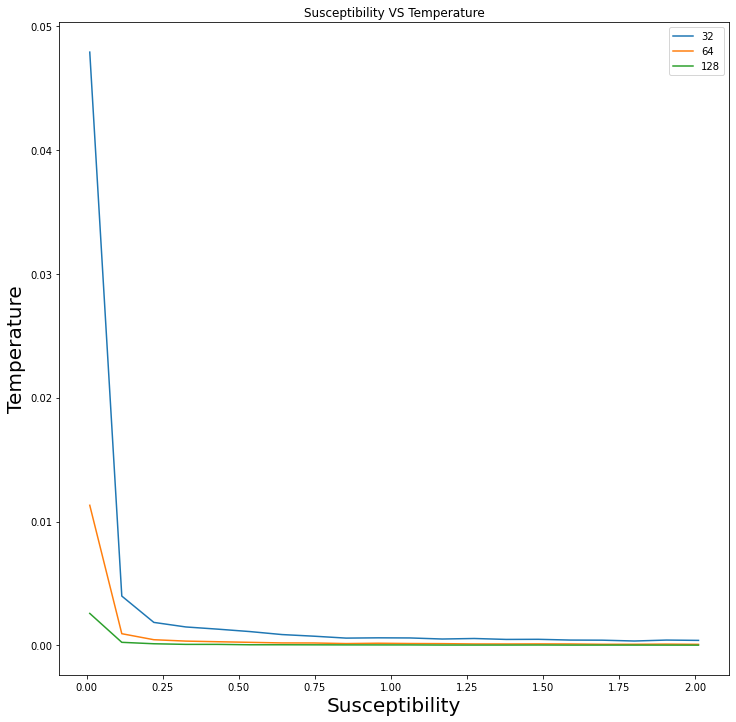

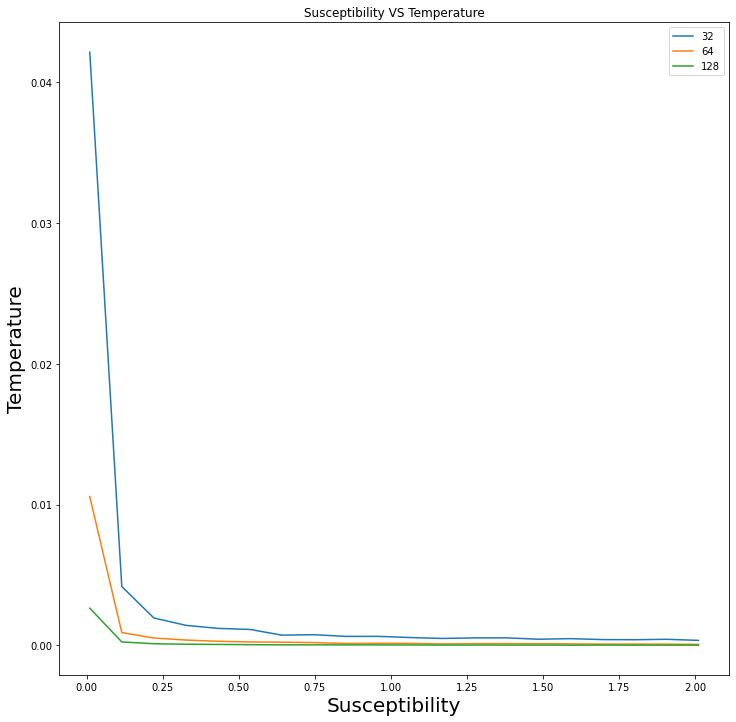

In [ ]:
for s in range(len(sigmas)):
  ax = plt.figure(figsize=(12,12)).add_subplot(111)
  plt.title("Susceptibility VS Temperature")
  for l in range(len(ChainLength)):
    plt.errorbar(Temperatures, ChiMatrix[s,l,],  fmt='-', ms=0,
                fcolor=None, label=ChainLength[l])
    plt.legend()
    plt.ylabel("Temperature", fontsize=20)
    plt.xlabel("Susceptibility", fontsize=20);

# RISULTATI

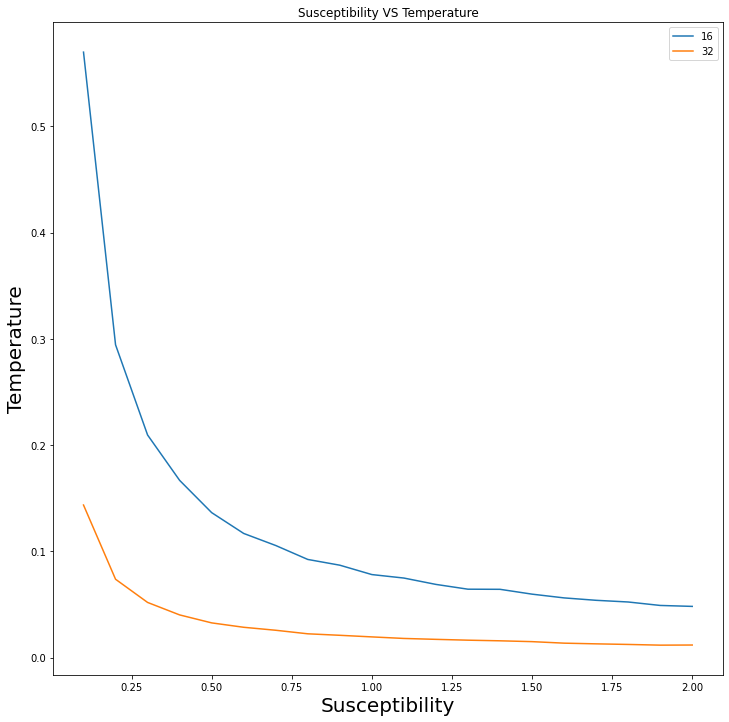

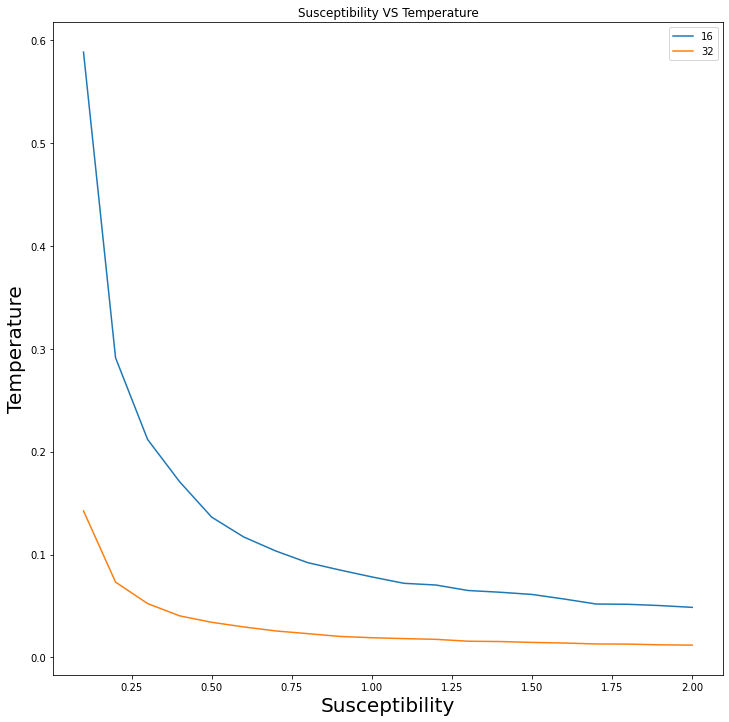

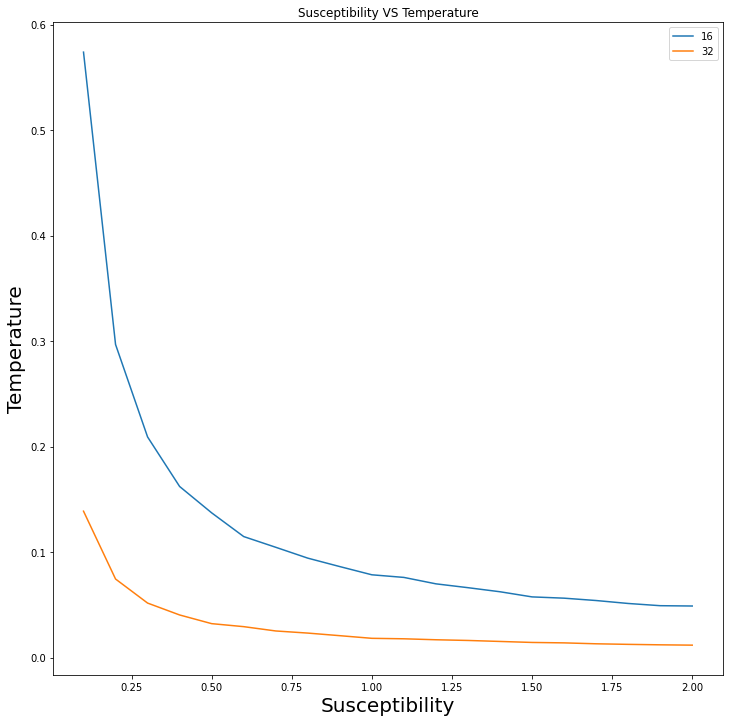

In [ ]:
for s in range(len(sigmas)):
  ax = plt.figure(figsize=(12,12)).add_subplot(111)
  plt.title("Susceptibility VS Temperature")
  for l in range(len(ChainLength)):
    plt.errorbar(Temperatures, ChiMatrix[s,l,]*L,  fmt='-', ms=0,
                fcolor=None, label=ChainLength[l])
    plt.legend()
    plt.ylabel("Temperature", fontsize=20)
    plt.xlabel("Susceptibility", fontsize=20);

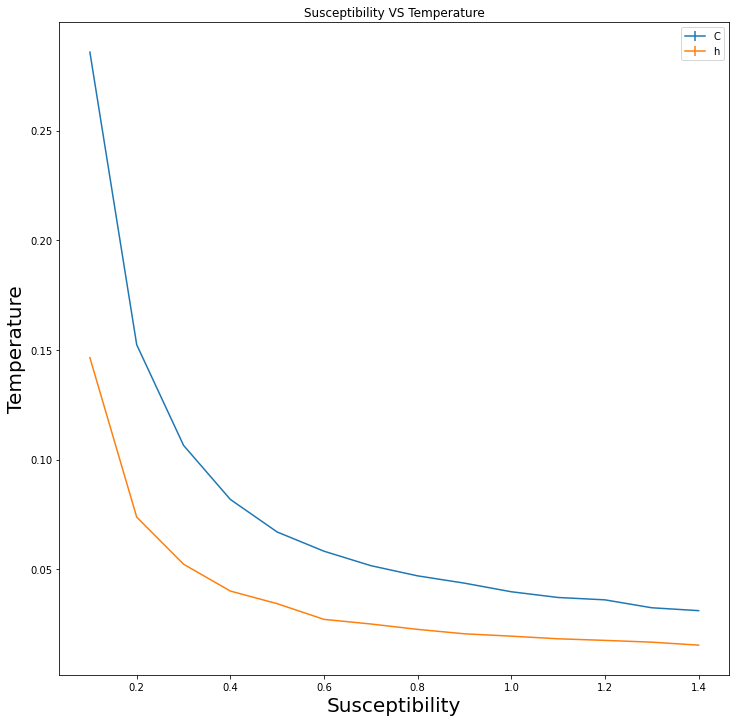

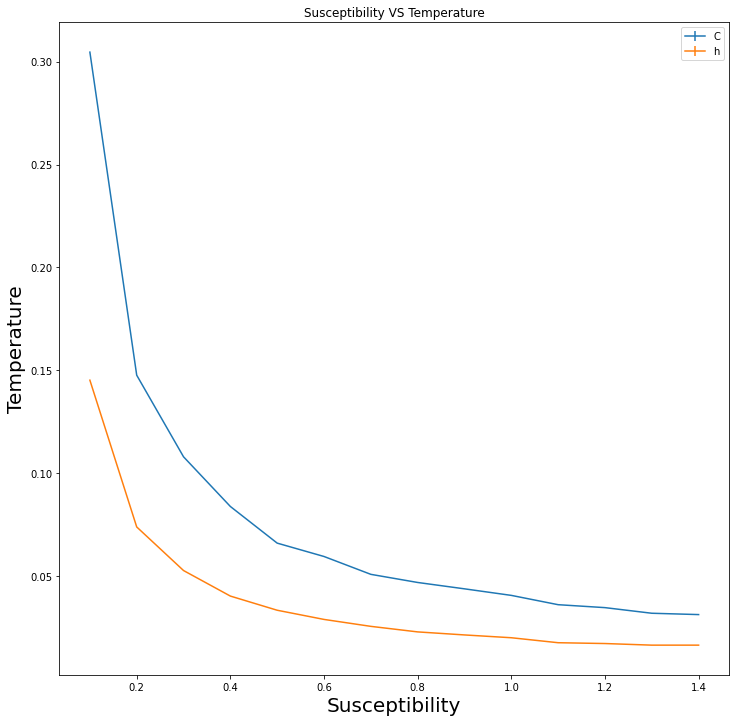

In [ ]:

for s in range(len(sigmas)):
  ax = plt.figure(figsize=(12,12)).add_subplot(111)
  plt.title("Susceptibility VS Temperature")
  for l in range(len(ChainLength)):
    plt.errorbar(Temperatures, ChiMatrix[s,l,], yerr=errChiMatrix[s,l,],  fmt='-', ms=0,
                fcolor=None, label=ChainLength[l])
    plt.legend("Chain Length:")
    plt.ylabel("Temperature", fontsize=20)
    plt.xlabel("Susceptibility", fontsize=20);

In [ ]:
mt,m2t,Chi,Spins

(array([ 0.0009625, -0.0039375,  0.0013625,  0.0019875,  0.0029125,
         0.002225 , -0.0010375,  0.004575 , -0.001225 , -0.0004875,
         0.0014875, -0.0029375, -0.0012875,  0.0047875]),
 array([0.01451641, 0.01477734, 0.01578828, 0.01608672, 0.01666953,
        0.01731875, 0.01784141, 0.01825469, 0.01918594, 0.01995391,
        0.01928828, 0.02057422, 0.02125859, 0.02291797]),
 array([0.1451548 , 0.0738092 , 0.05262142, 0.04020692, 0.0333221 ,
        0.02885633, 0.02548619, 0.0227922 , 0.02131604, 0.01995367,
        0.01753279, 0.01713799, 0.01635149, 0.01635361]),
 array([-1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,
         1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
         1., -1., -1., -1.,  1.,  1.]))

In [ ]:
L = 32
center = sp.stats.randint.rvs(0,L,size=32) #sampling the starting site
center

array([19,  1, 30, 29, 12,  1, 22, 14, 14, 31, 30,  4, 30, 14, 24, 18, 31,
       21,  8, 14, 13, 21, 19, 12,  2, 11,  8,  5, 23, 27,  2, 25])

In [2]:
def distance_PBC_1d(x,y,L):
  '''
  returns the distance between two sites in Periodic Boundary Condition
  '''
  return min((x-y)%L,(y-x)%L)


In [5]:
distance_PBC_1d(30,31,32)

1

In [55]:
i = 2
L = 10
for a in range(15):
  print( distance_PBC_1d(i,a,L) , min((i-a)%L,(a-i)%L))

2 2
1 1
0 0
1 1
2 2
3 3
4 4
5 5
4 4
3 3
2 2
1 1
0 0
1 1
2 2
